# Parameters

In [1]:
OUTPUT_DIR = 'output/1_day_out/'

# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.metrics import roc_curve, auc

plt.rcParams["figure.figsize"] = (12,12)

# Helper Functions

# Load Data

In [3]:
test_predictions = pd.read_csv(OUTPUT_DIR + 'test_predictions.csv')
train_predictions = pd.read_csv(OUTPUT_DIR + 'train_predictions.csv')

In [4]:
test_predictions.head()

,Blinded_ID,labels,predictions,labels_int
0,N2622,No Shock,0.000598,0
1,N1551,No Shock,0.007409,0
2,S0576,Shock,0.697122,1
3,N0724,No Shock,0.000133,0
4,N0563,No Shock,0.000113,0


# Plot ROC Curve

## Functions

In [5]:
def plot_roc_curve(data, title,FS=22,filename='roc.pdf'):
    fpr, tpr, _ = roc_curve(
    y_true=data['labels_int'],
    y_score=data['predictions'])

    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=[6,6])
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate',fontsize=FS,labelpad=20)
    plt.ylabel('True Positive Rate',fontsize=FS,labelpad=20)
    plt.title(title,fontsize=FS,y=1.02,fontweight='bold')
    plt.gca().tick_params(axis="x", labelsize=FS,)
    plt.gca().tick_params(axis="y", labelsize=FS)
    plt.legend(loc="lower right",fontsize=FS)
    
    for label in plt.gca().get_xticklabels():
        label.set_fontweight('demi') # If change to 551, label will be bold-like
    for label in plt.gca().get_yticklabels():
        label.set_fontweight('demi') # If change to 551, label will be bold-like
    plt.gca().tick_params(axis='both', which='major', pad=15)
    plt.gca().set_xlim(-0.05,None)
    saveFIG(filename)
    
def saveFIG(filename='tmp.pdf'):
    '''
        save fig for publication
    '''
    import pylab as plt
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
    plt.margins(0,0)
    #plt.gca().xaxis.set_major_locator(plt.NullLocator())
    #plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.savefig(filename,dpi=300, bbox_inches = 'tight',pad_inches = 0,transparent=True) 
    return

## Plotting

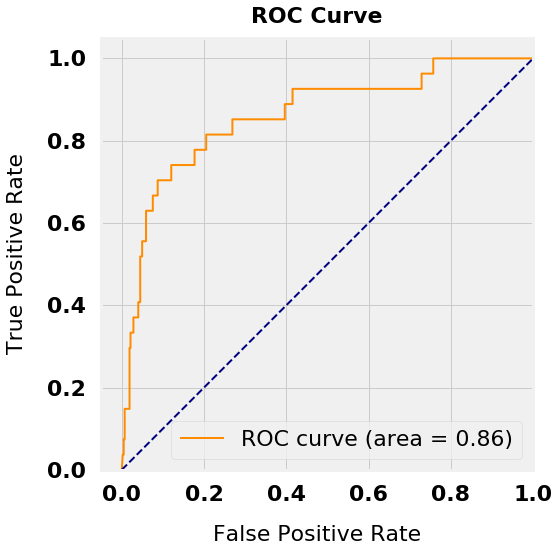

In [6]:
plot_roc_curve(test_predictions, 'ROC Curve',filename=OUTPUT_DIR + 'roc.pdf')

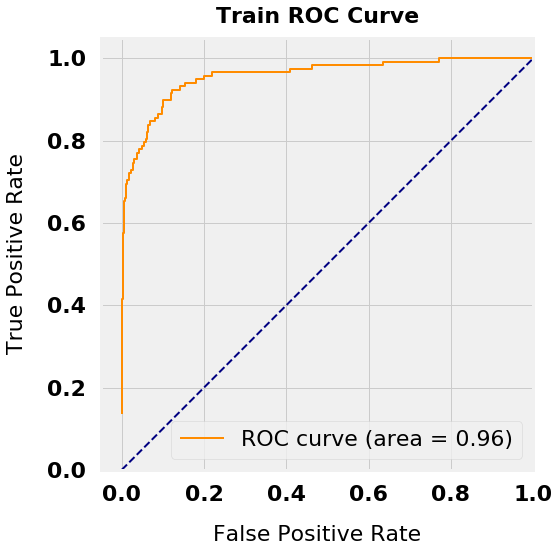

In [7]:
plot_roc_curve(train_predictions, 'Train ROC Curve',filename=OUTPUT_DIR + 'train_roc.pdf')